In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import csv
from sklearn.metrics import confusion_matrix

In [2]:
file = 'Tray/Ara2012/ara2012_tray02'
image = cv2.imread(file + '_rgb.png')

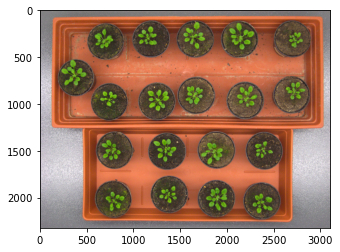

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [4]:
imageO = np.copy(image)
imageR = np.copy(image)
he = image.shape[0]


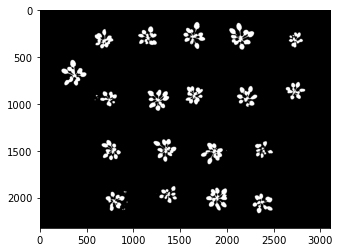

In [5]:

'''
# HSV method
# Object Tracking: extract a colored object

1. Convert from BGR to HSV color-space
2. We threshold the HSV image for a range of green color
3. Now extract the green object alone, we can do whatever on that image we want.
'''

LAB = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
lower_green = np.array([1,1,80])
upper_green = np.array([255,100,255])
mask = cv2.inRange(LAB, lower_green, upper_green)
mask = cv2.medianBlur(mask,7)
plt.imshow(mask, cmap=plt.cm.gray)
plt.show()

In [6]:

mask2 = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
mask2[mask2 <= 255] = 0
corners = []
count = 26

Number of contours = 63
Number of contours = 28
Number of contours = 23
Number of contours = 20
Number of contours = 19
red is generted, green is provided


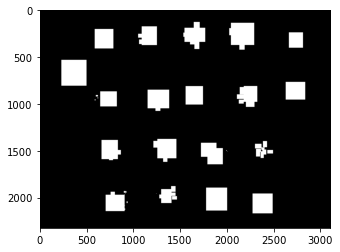

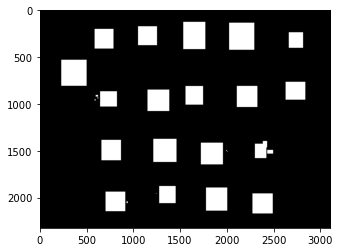

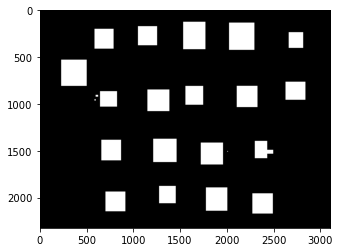

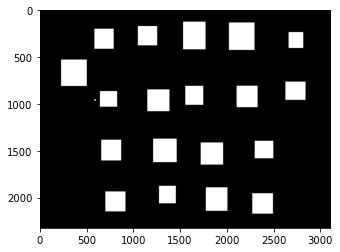

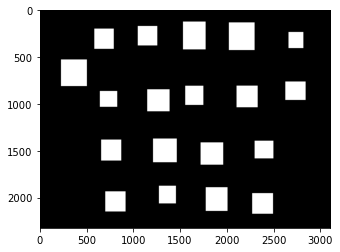

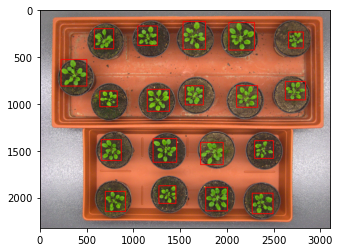

In [7]:
'''
Contours can be explained simply as a curve joining all the continuous points (along the boundary), 
having same color or intensity.
The contours are a useful tool for shape analysis and object detection and recognition.

0. set an threshold for iteration time (n = 9) and count (count < 20)
1. find all the contour according to the the img
2. if is_last iteration:
        draw rectangle in original images
   else: 
        draw thick rectangle in the picture of all the dectected object(make them connected)

'''


corners = []
count = 26
for a in range(9):
    if count < 20:
        continue
    if a > 0:
        gray = image
    if a == 0:
        gray = mask

    image = np.copy(mask2)
    edged = cv2.Canny(gray, 30, 200)

    _, contours, hierarchy = cv2.findContours(edged,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

    rects = []
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        rects.append([x, y, w, h])
        rects.append([x, y, w, h])
    rects,weights = cv2.groupRectangles(rects, 1, 0.1*a)
    count = len(rects)
    print("Number of contours = " + str(count)) 
    
    
    
    for rec in rects:
        # draw thick rectangle in the picture of all the dectected object(make them connected)
        cv2.rectangle(image,(rec[0],rec[1]),(rec[0]+rec[2],rec[1]+rec[3]),255,-1)
        
        # if it's last iteration draw rectangle in original images
        if (count < 20 or a == 8):
            x = [rec[0],rec[1],rec[0]+rec[2],rec[1]+rec[3]]
            corners.append(x)
            cv2.rectangle(imageO,(rec[0],rec[1]),(rec[0]+rec[2],rec[1]+rec[3]),(255,0,0),7)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.show()
print("red is generted, green is provided")
plt.imshow(imageO)
plt.show()
corners  = sorted(corners,key=lambda x: (x[1]))
corners = np.array(corners)
corners = np.resize(corners,(6,6,4))
for a in range(6):
    corners[a] = np.sort(corners[a],0)
corners = np.resize(corners,(24,4))
corners = corners.tolist()